In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import norm

In [29]:
pathTrain = 'twitter_training.csv'
pathValid = 'twitter_validation.csv'


# Names for columns in the dataframe
column_names = ['ID', 'Name','Label', 'Content']

# Read file CSV and Name the columns
df_train = pd.read_csv(pathTrain, names=column_names)
df_valid = pd.read_csv(pathValid, names=column_names)

# Show data
print('-----------------------------------------DATA TRAIN---------------------------------------')
print(df_train)
df_train.info()
print('-----------------------------------------DATA VALIDATION----------------------------------')
print(df_valid)
df_valid.info()

-----------------------------------------DATA TRAIN---------------------------------------
         ID         Name     Label  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows p

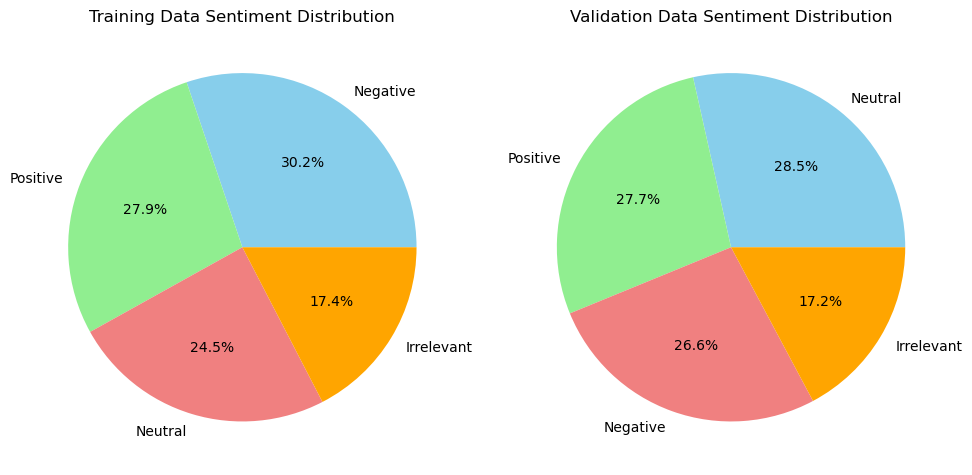

In [8]:
# Calculate the number of sentiment labels in training data and validation data
train_sentiment_counts = df_train['Label'].value_counts()
valid_sentiment_counts = df_valid['Label'].value_counts()

# Draw a pie chart for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(train_sentiment_counts, labels=train_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')

# Draw a pie chart for the valid data
plt.subplot(1, 2, 2)
plt.pie(valid_sentiment_counts, labels=valid_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')

plt.tight_layout()
plt.show()

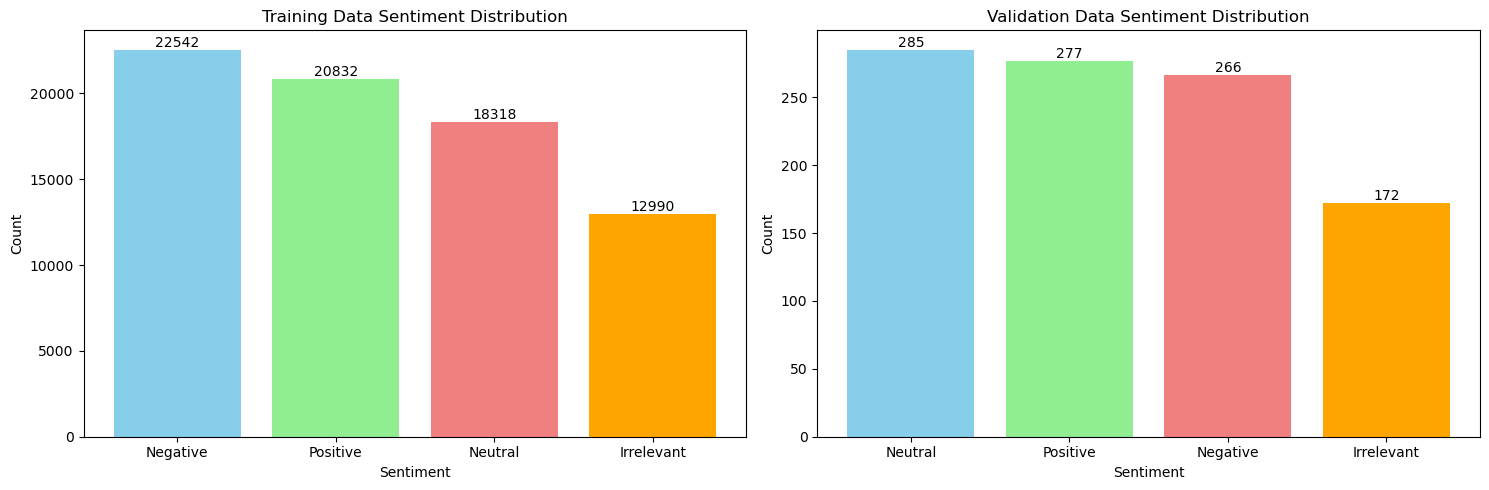

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(train_sentiment_counts.index, train_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(train_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')


plt.subplot(1, 2, 2)
plt.bar(valid_sentiment_counts.index, valid_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(valid_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [20]:
# Models
models = [
    MultinomialNB(),
    SVC(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier()
]

# Feature extraction methods
vectorizers = [
    ('TF-IDF', TfidfVectorizer()),
    ('Count Vectorizer', CountVectorizer())
]

# Example sentences
new_examples = [
    "I love playing League of Legends!",
    "This game is terrible. I hate it.",
    "Neutral tweet about League of Legends."
]

# Loop through models and vectorizers for training and evaluation
for model in models:
    for vectorizer_name, vectorizer in vectorizers:
        # Define a pipeline with feature engineering and a machine learning algorithm
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', model)
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Evaluate the model
        y_pred = pipeline.predict(X_validation)
        accuracy = accuracy_score(y_validation, y_pred)
        report = classification_report(y_validation, y_pred)
        confusion = confusion_matrix(y_validation, y_pred)
        
       
        # Display results
        print(f"\nModel: {model.__class__.__name__}, Vectorizer: {vectorizer_name}")
        print("Accuracy:", accuracy)
        print("Classification Report:\n", report)
        print("Confusion Matrix:\n", confusion)

        
        
        # Predict the sentiment of new examples
        predicted_sentiments = pipeline.predict(new_examples)
        for example, sentiment in zip(new_examples, predicted_sentiments):
            print(f"Example: '{example}' - Predicted Sentiment: {sentiment}")
        print("\n------------------------------------------------------------------------------------")



Model: MultinomialNB, Vectorizer: TF-IDF
Accuracy: 0.8902691511387164
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      0.52      0.68        66
    Negative       0.86      0.97      0.91       117
     Neutral       0.86      0.96      0.91       175
    Positive       0.95      0.92      0.93       125

    accuracy                           0.89       483
   macro avg       0.92      0.84      0.86       483
weighted avg       0.90      0.89      0.88       483

Confusion Matrix:
 [[ 34   9  21   2]
 [  0 113   1   3]
 [  0   6 168   1]
 [  0   4   6 115]]
Example: 'I love playing League of Legends!' - Predicted Sentiment: Positive
Example: 'This game is terrible. I hate it.' - Predicted Sentiment: Negative
Example: 'Neutral tweet about League of Legends.' - Predicted Sentiment: Negative

------------------------------------------------------------------------------------

Model: MultinomialNB, Vectorizer: Count Vectorizer
